In [6]:
library(tidyverse)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2          ✔ readr     2.1.4     
✔ forcats   1.0.0.9000     ✔ stringr   1.5.1     
✔ ggplot2   3.4.4          ✔ tibble    3.2.1     
✔ lubridate 1.9.2          ✔ tidyr     1.3.0     
✔ purrr     1.0.2          
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [7]:
Pm_data <- readRDS("/home/jpm73279/genome_downloads/C4_markers/shuffled_null_dist_storage/Pm.shuffled_null_dist.rds") %>% 
    dplyr::mutate(species = "Pm")
Sb_data <- readRDS("/home/jpm73279/genome_downloads/C4_markers/shuffled_null_dist_storage/Sb.shuffled_null_dist.rds") %>% 
    dplyr::mutate(species = "Sb")
Zm_data <- readRDS("/home/jpm73279/genome_downloads/C4_markers/shuffled_null_dist_storage/Zm.shuffled_null_dist.rds") %>% 
    dplyr::mutate(species = "Zm")
Uf_data <- readRDS("/home/jpm73279/genome_downloads/C4_markers/shuffled_null_dist_storage/Uf.shuffled_null_dist.rds") %>% 
    dplyr::mutate(species = "Uf")
Os_data <- readRDS("/home/jpm73279/genome_downloads/C4_markers/shuffled_null_dist_storage/Os.shuffled_null_dist.rds") %>% 
    dplyr::mutate(species = "Os")




enzyme_family_class <- data.frame(gene_family=c("AlaAT", "AspAT", "CA", "DIC", "DIT", "NADMDH", "NADME", "NADPMDH", "NADPME", "NHD", "PEPCK", "PEPC", "PPDKRP", "PPDK", "PPT", "RBCS", "RCA", "BASS"),
                                  enzyme_class=c("variable", "variable", "core", "core", "variable", "variable", "variable", "variable", "variable", "variable", "core", "core", "core", "core", "core", "core", "core", "variable"))


combined_null_pvals <- bind_rows(Pm_data,Sb_data, Zm_data, Uf_data, Os_data) %>% 
    tidyr::separate(locus, into = c("species_other", "loci"), sep = "__",remove = FALSE) %>%
    tidyr::separate(loci, into = c("gene_family", "number"), sep = "_", remove = FALSE) %>% 
    left_join(., enzyme_family_class, by = c("gene_family"))



Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 26 rows [1102, 1128,
1158, 1188, 1216, 1244, 1272, 1297, 1324, 1349, 1374, 1398, 1424, 1451, 1479,
1510, 1538, 1564, 1588, 1640, ...].”


In [8]:

## Load Markers for All Species
marker_file_paths <- c("/home/jpm73279/genome_downloads/C4_markers/Os.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Pm.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Sb.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Uf.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Zm.c4_markers.bed")

# Function to read and process the file
process_file <- function(file_path) {
  species <- substr(basename(file_path), 1, 2)
  read_delim(file_path, delim = "\t", col_names = c("chrom", "start", "end", "geneID", "name", "type")) %>% 
    dplyr::select("chrom","start","end","geneID","name","type") %>%
    dplyr::mutate(species = (species))
}

# Apply the function to each file and store results in a list
list_of_dataframes <- lapply(marker_file_paths, process_file)

# Optionally combine all dataframes into one if needed
markers <- bind_rows(list_of_dataframes) %>% 
    dplyr::select(geneID,name,type,species) 


Rows: 30 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 52 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 33 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 31 Columns: 6

In [9]:
head(combined_data)

ERROR: Error in head(combined_data): object 'combined_data' not found


In [10]:
# header_bed <- c('chr','start','end','id','score')
# zm_acr_intersections <- read_delim("/home/jpm73279/genome_downloads/C4_markers/conservation/zm.all_intersection_acr.intersection.bed", 
#             col_names = header_bed) %>% 
#     separate(id, into = c("acr", "acr_cell_type_specific_class", "locus"), sep = ";") %>%
#     dplyr::mutate(acr_cell_type_specific_class = case_when(acr_cell_type_specific_class == "bundle_sheath,procambial_meristem" ~ "bundle_sheath",
#                                                           acr_cell_type_specific_class == "bundle_sheath,procambium" ~ "bundle_sheath", 
#                                                           TRUE ~ acr_cell_type_specific_class)) %>% 
#     tidyr::separate(locus, into = c("species_other", "loci"), sep = "__",remove = FALSE) %>%
#     tidyr::separate(loci, into = c("gene_family", "number"), sep = "_", remove = FALSE)

# combined_acrs_marker_info <- left_join(zm_acr_intersections, markers, by = c("locus" = "name")) %>% 
#     select(acr,acr_cell_type_specific_class, locus, gene_family, type)



process_file <- function(file_path, species_name) {
  header_bed <- c('chr','start','end','id','score')
  
  read_delim(file_path, 
             col_names = header_bed, 
             delim = "\t") %>%
    separate(id, into = c("acr", "acr_cell_type_specific_class", "locus"), sep = ";") %>%
    mutate(acr_cell_type_specific_class = case_when(
      acr_cell_type_specific_class == "bundle_sheath,procambial_meristem" ~ "bundle_sheath",
      acr_cell_type_specific_class == "bundle_sheath,procambium" ~ "bundle_sheath", 
      TRUE ~ acr_cell_type_specific_class)) %>%
    separate(locus, into = c("species_other", "loci"), sep = "__", remove = FALSE) %>%
    separate(loci, into = c("gene_family", "number"), sep = "_", remove = FALSE) %>%
    mutate(species = species_name)
}

# List of file paths and corresponding species names
file_paths <- c("/home/jpm73279/genome_downloads/C4_markers/conservation/zm.all_intersection_acr.intersection.bed",
                "/home/jpm73279/genome_downloads/C4_markers/conservation/sb.all_intersection_acr.intersection.bed",
                "/home/jpm73279/genome_downloads/C4_markers/conservation/pm.all_intersection_acr.intersection.bed",
                "/home/jpm73279/genome_downloads/C4_markers/conservation/uf.all_intersection_acr.intersection.bed",
                "/home/jpm73279/genome_downloads/C4_markers/conservation/os.all_intersection_acr.intersection.bed")
species_names <- c("Zm", "Sb", "Pm", "Uf", "Os")

# Apply the function to each file
processed_files <- map2(file_paths, species_names, process_file)

# Optional: Combine all processed data frames into one (if needed)
combined_data <- bind_rows(processed_files)

combined_acrs_marker_info <- left_join(combined_data, markers, by = c("locus" = "name", "species")) %>% 
    select(acr,acr_cell_type_specific_class, locus, gene_family, type, species)





Rows: 146 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): chr, id, score
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 144 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): chr, id, score
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 5 rows [10, 11, 12, 13,
14].”
Rows: 178 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): chr, id, score
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or

In [11]:
count_n_acrs_region <- combined_acrs_marker_info %>% 
    dplyr::group_by(species, locus, gene_family) %>% 
    summarise(number_acrs = n())


`summarise()` has grouped output by 'species', 'locus'. You can override using
the `.groups` argument.


In [12]:
enzyme_family_class <- data.frame(gene_family=c("AlaAT", "AspAT", "CA", "DIC", "DIT", "NADMDH", "NADME", "NADPMDH", "NADPME", "NHD", "PEPCK", "PEPC", "PPDKRP", "PPDK", "PPT", "RBCS", "RCA", "BASS"),
                                  enzyme_class=c("variable", "variable", "core", "core", "variable", "variable", "variable", "variable", "variable", "variable", "core", "core", "core", "core", "core", "core", "core", "variable"))


unnested_nulls <- combined_null_pvals %>% 
    dplyr::rename(enzyme_type = type) %>% 
    unnest(data) %>% 
    left_join(., count_n_acrs_region, by = c("species", "locus", "gene_family")) %>% 
    dplyr::mutate(avg_motif_per_acr_null = counts/number_acrs,
                 avg_motif_per_acr_real = real_counts/number_acrs)

In [13]:
combined_null_pvals %>% 
    dplyr::filter(pval < .02) %>% 
    dplyr::select(-data) %>% 
    dplyr::group_by(locus, TF_ID, species, enzyme_class, gene_family) %>% 
    summarise(mean_tf_counts = mean(real_counts),
              sd_counts = sd(real_counts,na.rm=TRUE),
             mean_p = mean(pval)) %>% 
    dplyr::arrange(species, TF_ID) %>% 
    dplyr::filter(gene_family == "PPDKRP")

`summarise()` has grouped output by 'locus', 'TF_ID', 'species',
'enzyme_class'. You can override using the `.groups` argument.


locus        TF_ID        species enzyme_class gene_family mean_tf_counts
1 Os__PPDKRP_1 C2C2_GATA    Os      core         PPDKRP      16            
2 Pm__PPDKRP_1 C2C2_Dof     Pm      core         PPDKRP       5            
3 Sb__PPDKRP_1 GARP_ARR-B   Sb      core         PPDKRP      12            
4 Sb__PPDKRP_1 ms_CGTCGTCGT Sb      core         PPDKRP      73            
5 Uf__PPDKRP_1 SBP          Uf      core         PPDKRP       7            
6 Zm__PPDKRP_1 C2C2_GATA    Zm      core         PPDKRP       8            
  sd_counts mean_p      
1 NA        0.0077002053
2 NA        0.0179602309
3 NA        0.0015151515
4 NA        0.0004997501
5 NA        0.0007639419
6 NA        0.0172626387

In [14]:
combined_null_pvals %>% 
    #dplyr::filter(pval < .05) %>% 
    dplyr::filter(species %in% c("Zm", "Sb")) %>% 
    arrange(TF_ID) %>% 
    select(-data) %>% 
    dplyr::filter(enzyme_class == "core") %>% 
    dplyr::filter(gene_family == "RCA")

TF_ID        type          locus     species_other loci  gene_family number
1  ARF          bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
2  ARF          bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
3  AS2LOB       bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
4  AS2LOB       bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
5  BBRBPC       bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
6  BBRBPC       bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
7  BES1         bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
8  BES1         bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
9  C2C2_Dof     bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
10 C2C2_Dof     bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
11 C2C2_GATA    bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
12 C2C2_GATA    bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
13 CAMTA        bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
14 CAMTA        bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
15 CPP          bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
16 CPP          bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
17 E2FDP        bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
18 E2FDP        bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
19 GARP_ARR-B   bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
20 GARP_ARR-B   bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
21 GARP_G2-like bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
22 GARP_G2-like bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
23 HD           bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
24 HD           bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
25 HD-Zip_IV    bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
26 HD-Zip_IV    bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
27 HD-Zip_I_II  bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
28 HD-Zip_I_II  bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
29 HD_PLINC     bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
30 HD_PLINC     bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
31 HSF          bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
32 HSF          bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
33 MADS_MIKC    bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
34 MADS_MIKC    bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
35 NAC          bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
36 NAC          bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
37 SBP          bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
38 SBP          bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
39 WRKY         bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
40 WRKY         bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
41 bHLH_TCP     bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
42 bHLH_TCP     bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
43 bs_CATG      bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
44 bs_CATG      bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
45 bs_DOF       bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
46 bs_DOF       bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
47 bs_GCCGCC    bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
48 bs_GCCGCC    bundle_sheath Zm__RCA_1 Zm            RCA_1 RCA         1     
49 ms_AGCTA     bundle_sheath Sb__RCA_1 Sb            RCA_1 RCA         1     
50 ms_AGCTA     bundle_sheath Zm__RCA_1 Zm           

In [17]:
head(unnested_nulls)

TF_ID enzyme_type   locus       species_other loci    gene_family number
1 ARF   bundle_sheath Pm__AlaAT_1 Pm            AlaAT_1 AlaAT       1     
2 ARF   bundle_sheath Pm__AlaAT_1 Pm            AlaAT_1 AlaAT       1     
3 ARF   bundle_sheath Pm__AlaAT_1 Pm            AlaAT_1 AlaAT       1     
4 ARF   bundle_sheath Pm__AlaAT_1 Pm            AlaAT_1 AlaAT       1     
5 ARF   bundle_sheath Pm__AlaAT_1 Pm            AlaAT_1 AlaAT       1     
6 ARF   bundle_sheath Pm__AlaAT_1 Pm            AlaAT_1 AlaAT       1     
  real_counts sample nested_index type counts passing_val length_null pval     
1 1           real   1            None 1      828         1481        0.5590817
2 1           real   2            None 2      828         1481        0.5590817
3 1           real   3            None 2      828         1481        0.5590817
4 1           real   5            None 1      828         1481        0.5590817
5 1           real   6            None 1      828         1481        0.5590817
6 1           real   8            None 2      828         1481        0.5590817
  species enzyme_class number_acrs avg_motif_per_acr_null
1 Pm      variable     2           0.5                   
2 Pm      variable     2           1.0                   
3 Pm      variable     2           1.0                   
4 Pm      variable     2           0.5                   
5 Pm      variable     2           0.5                   
6 Pm      variable     2           1.0                   
  avg_motif_per_acr_real
1 0.5                   
2 0.5                   
3 0.5                   
4 0.5                   
5 0.5                   
6 0.5

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


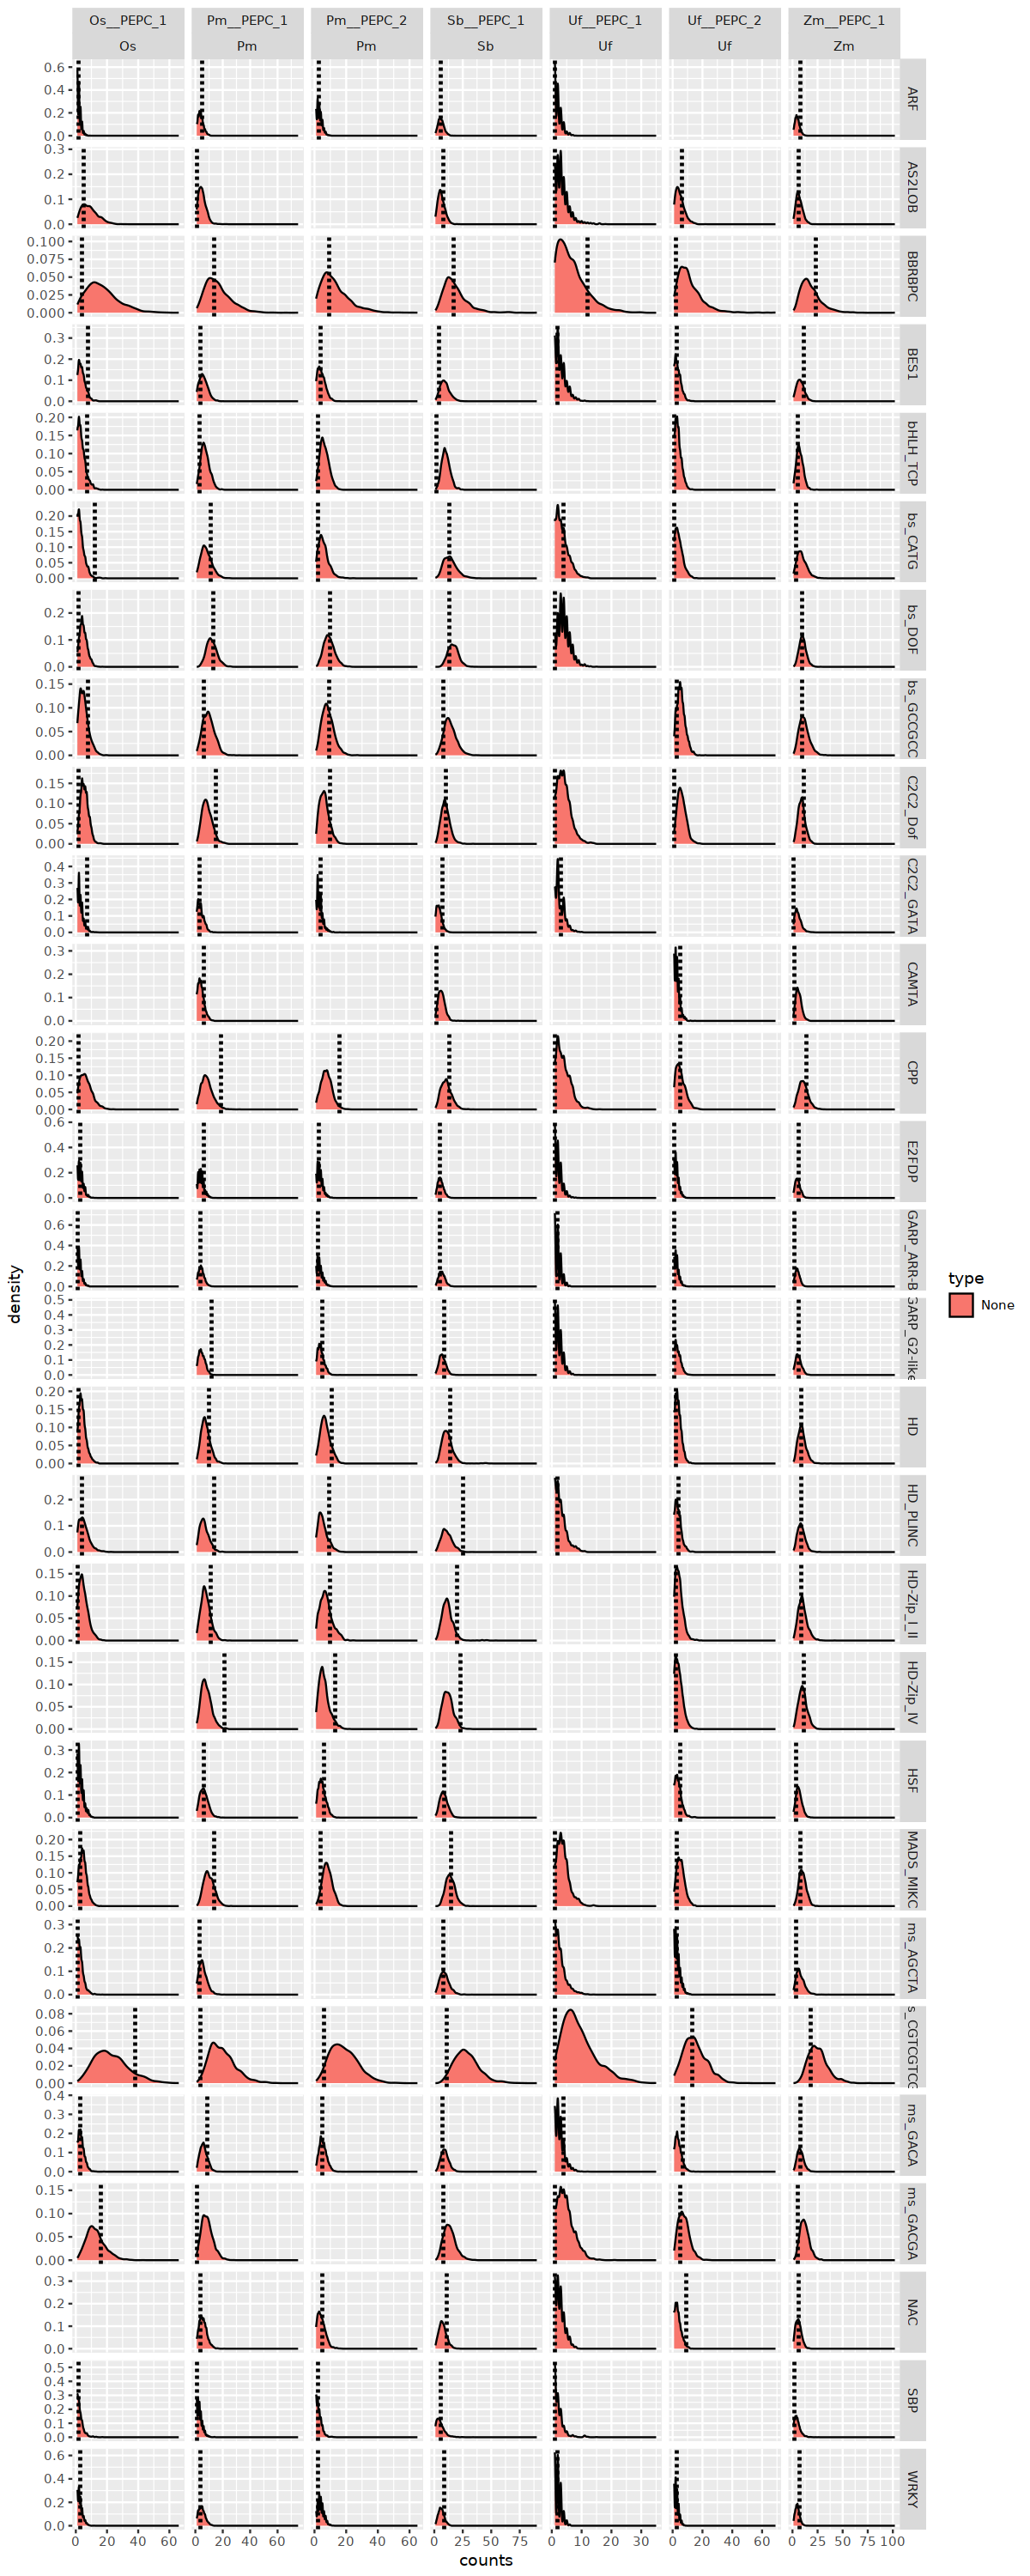

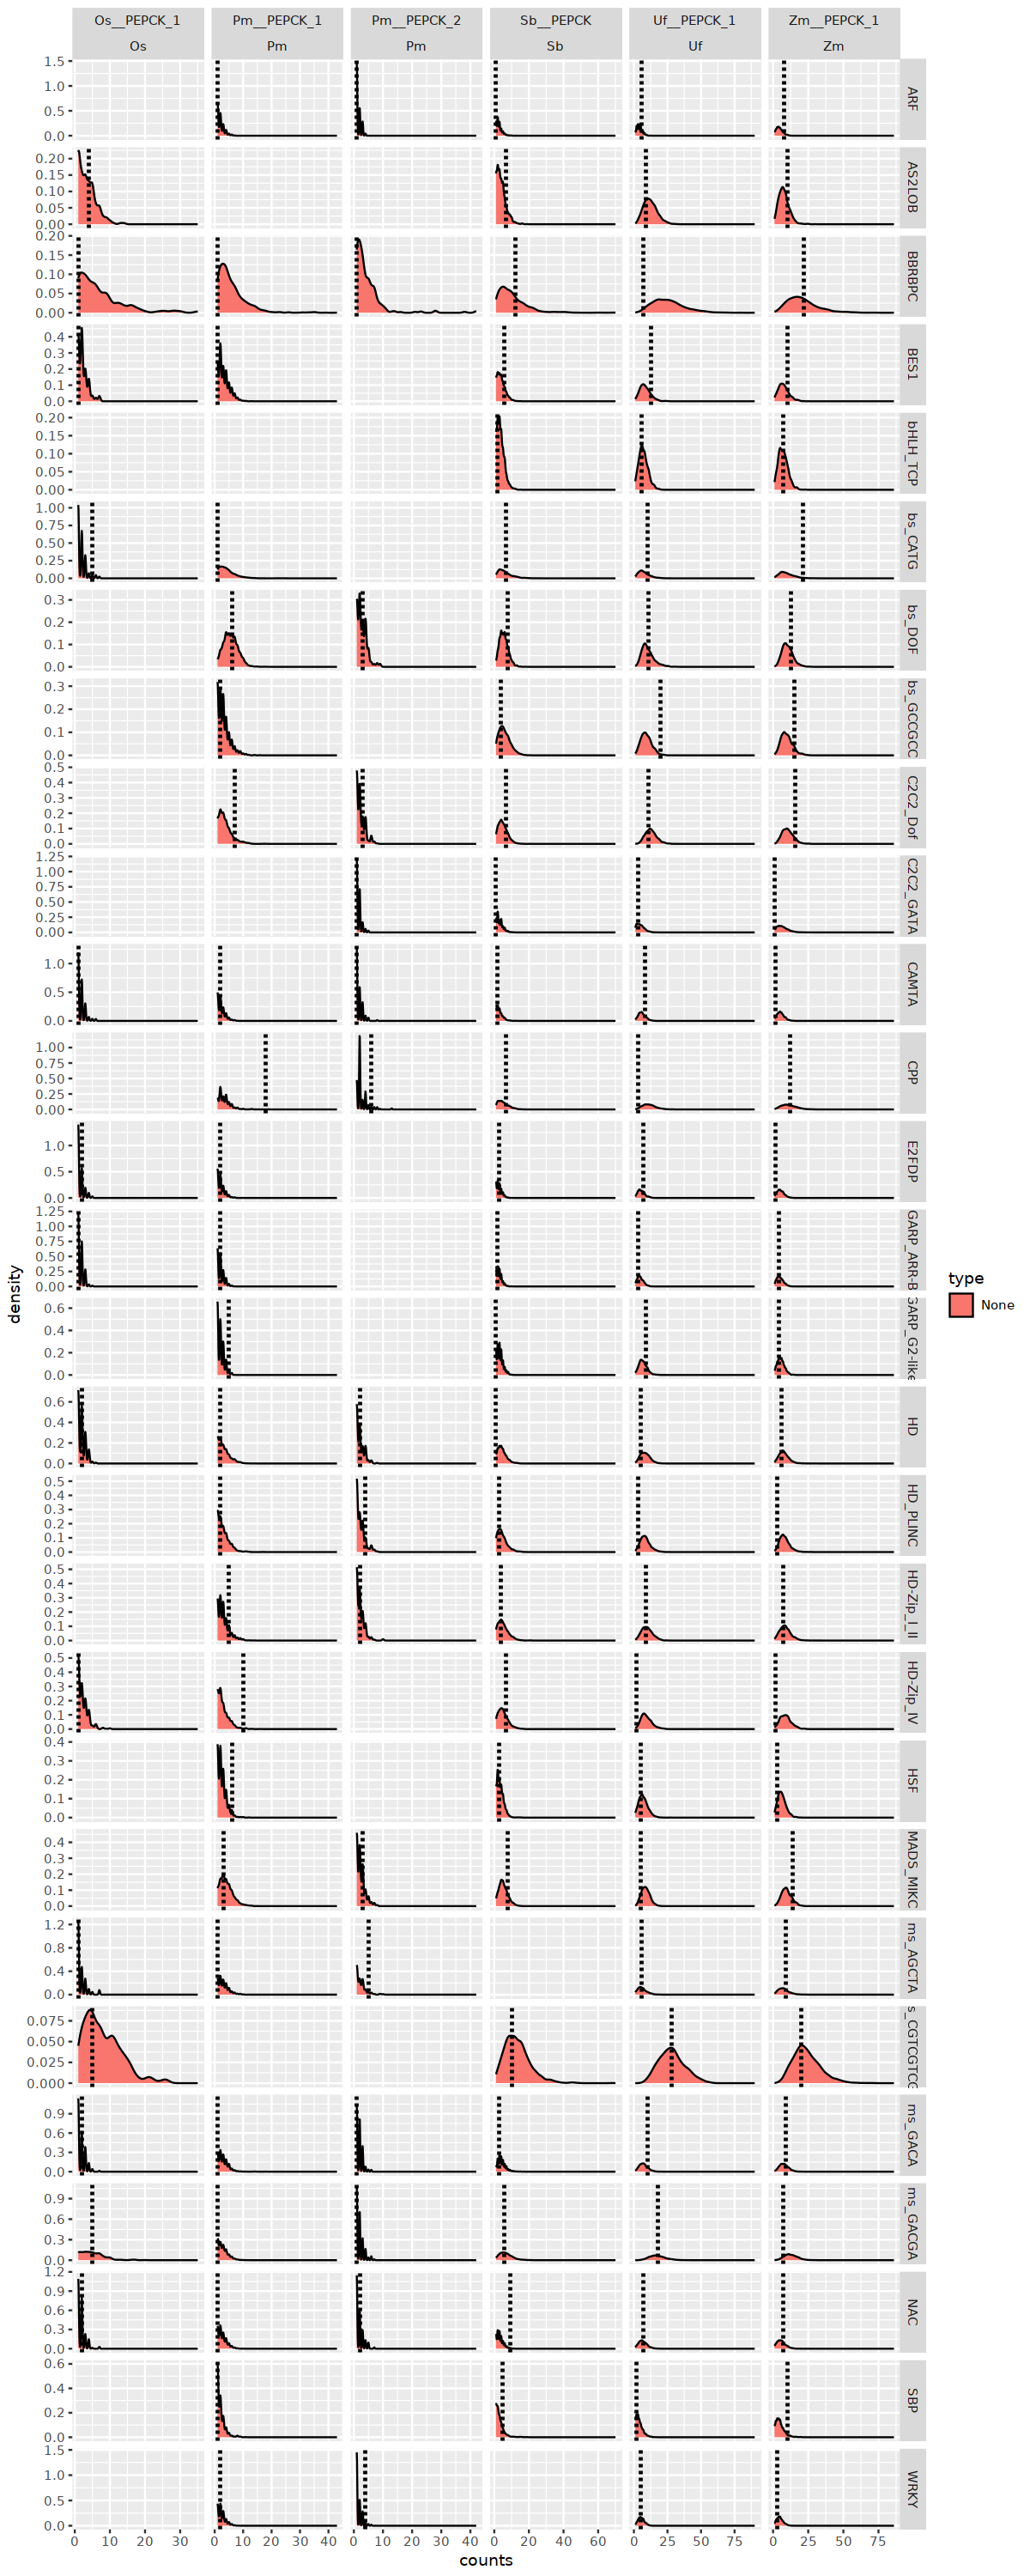

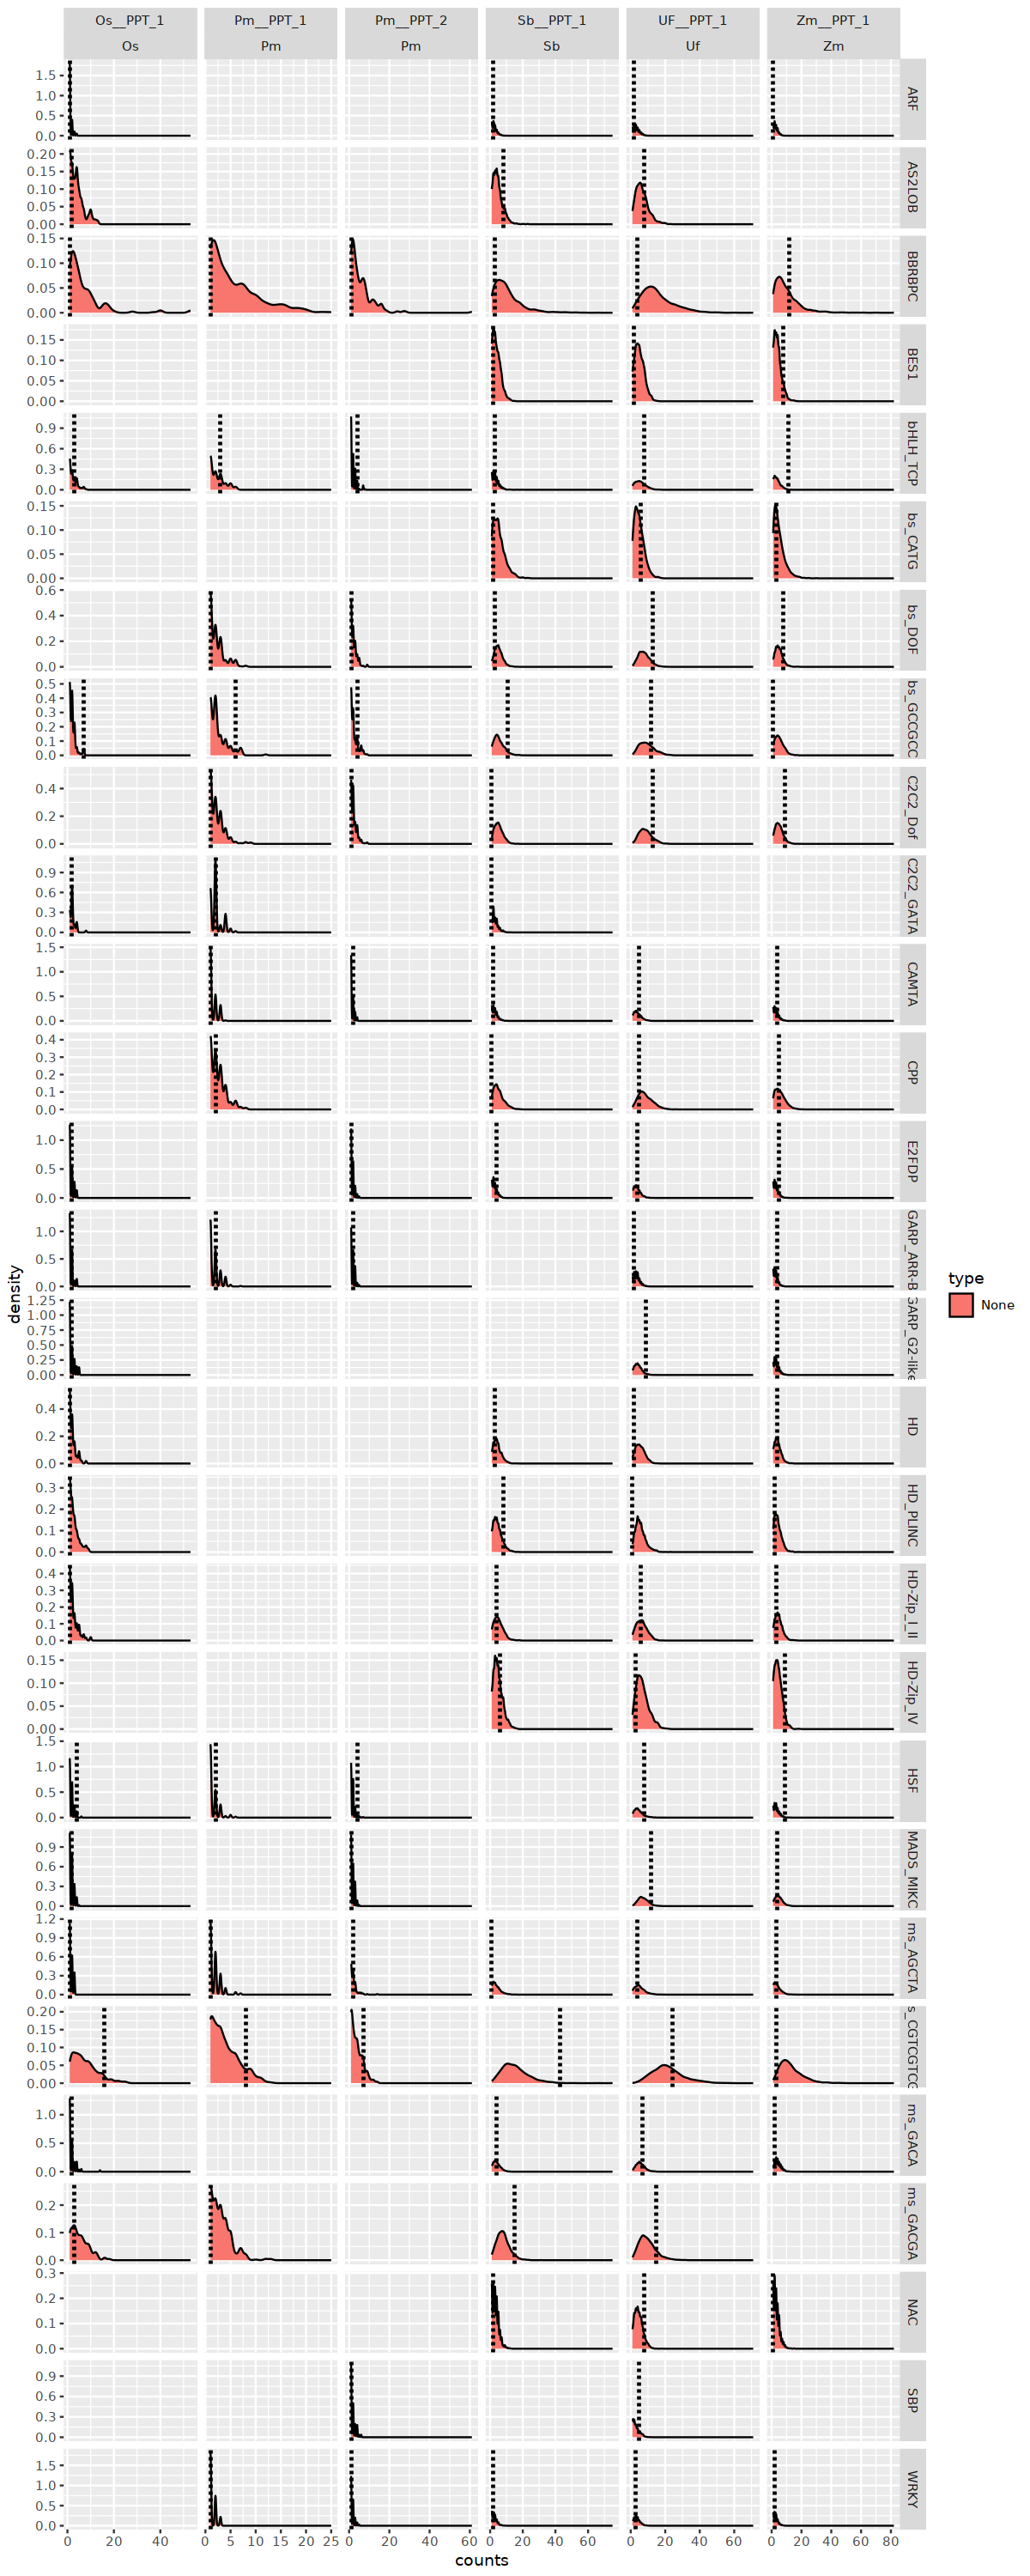

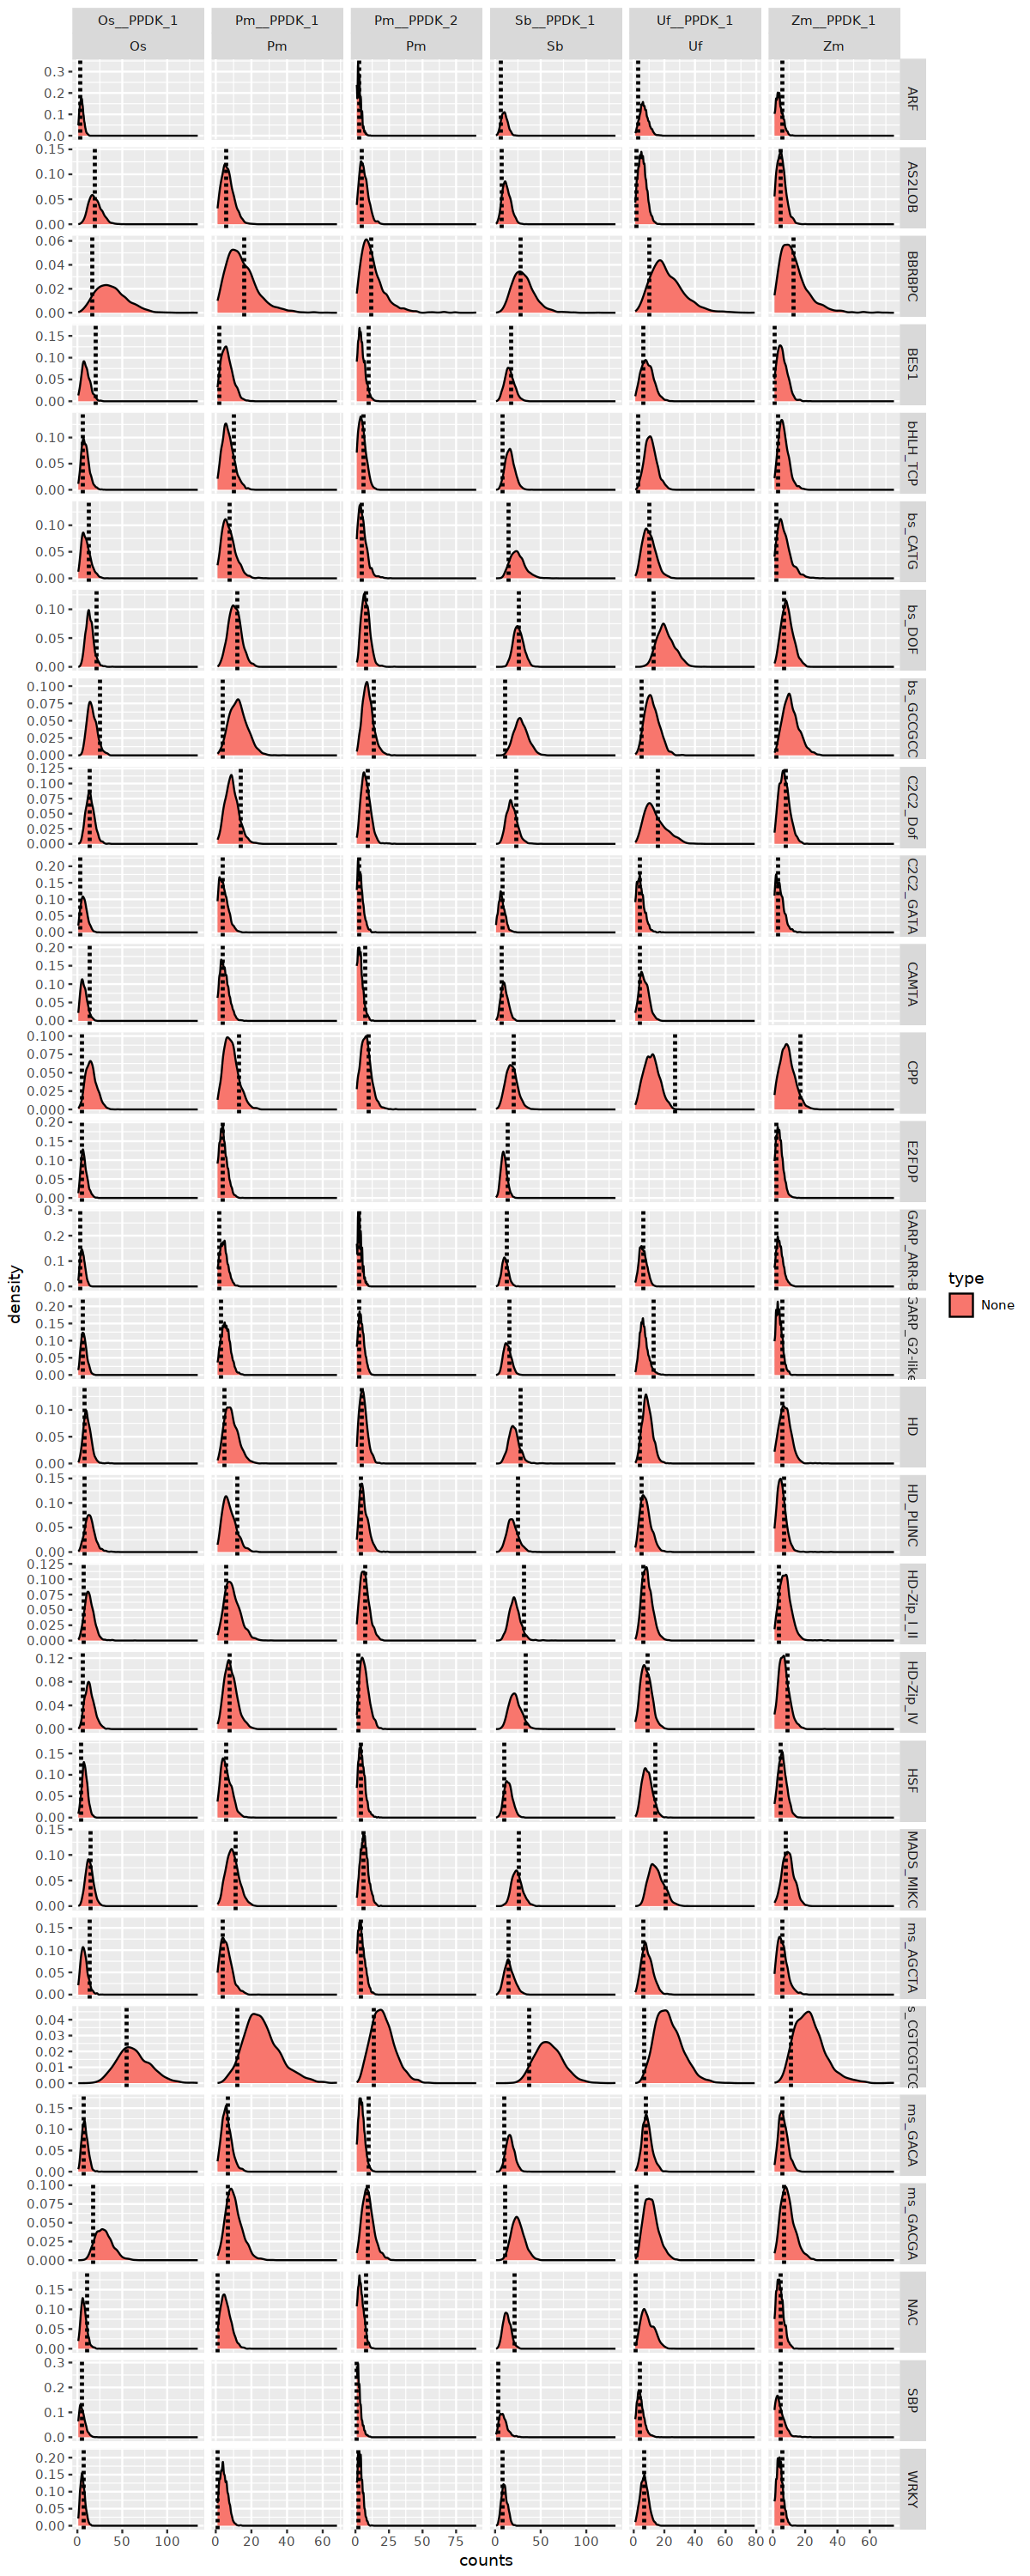

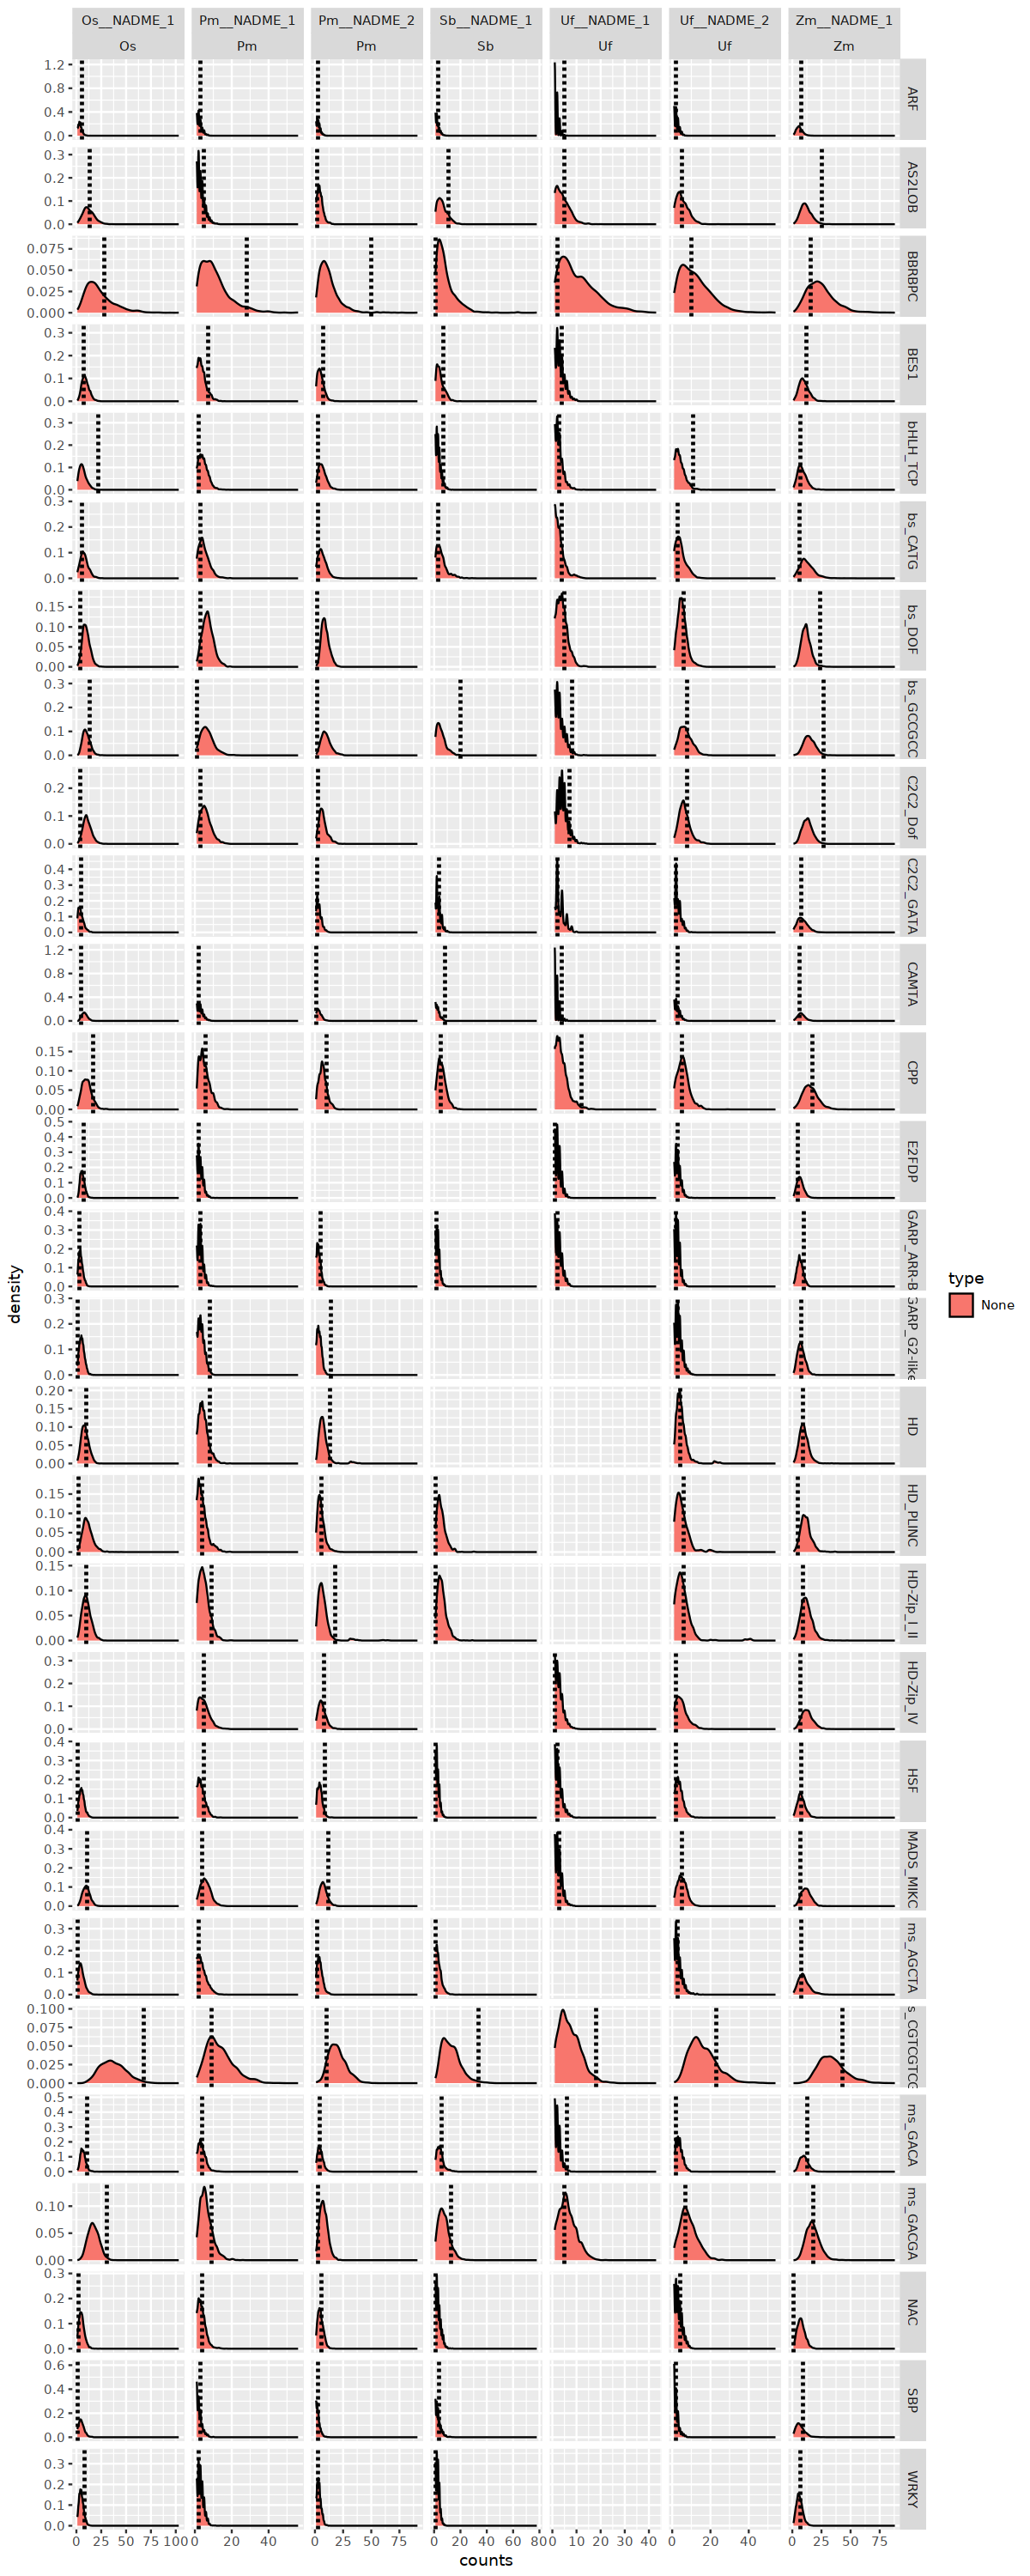

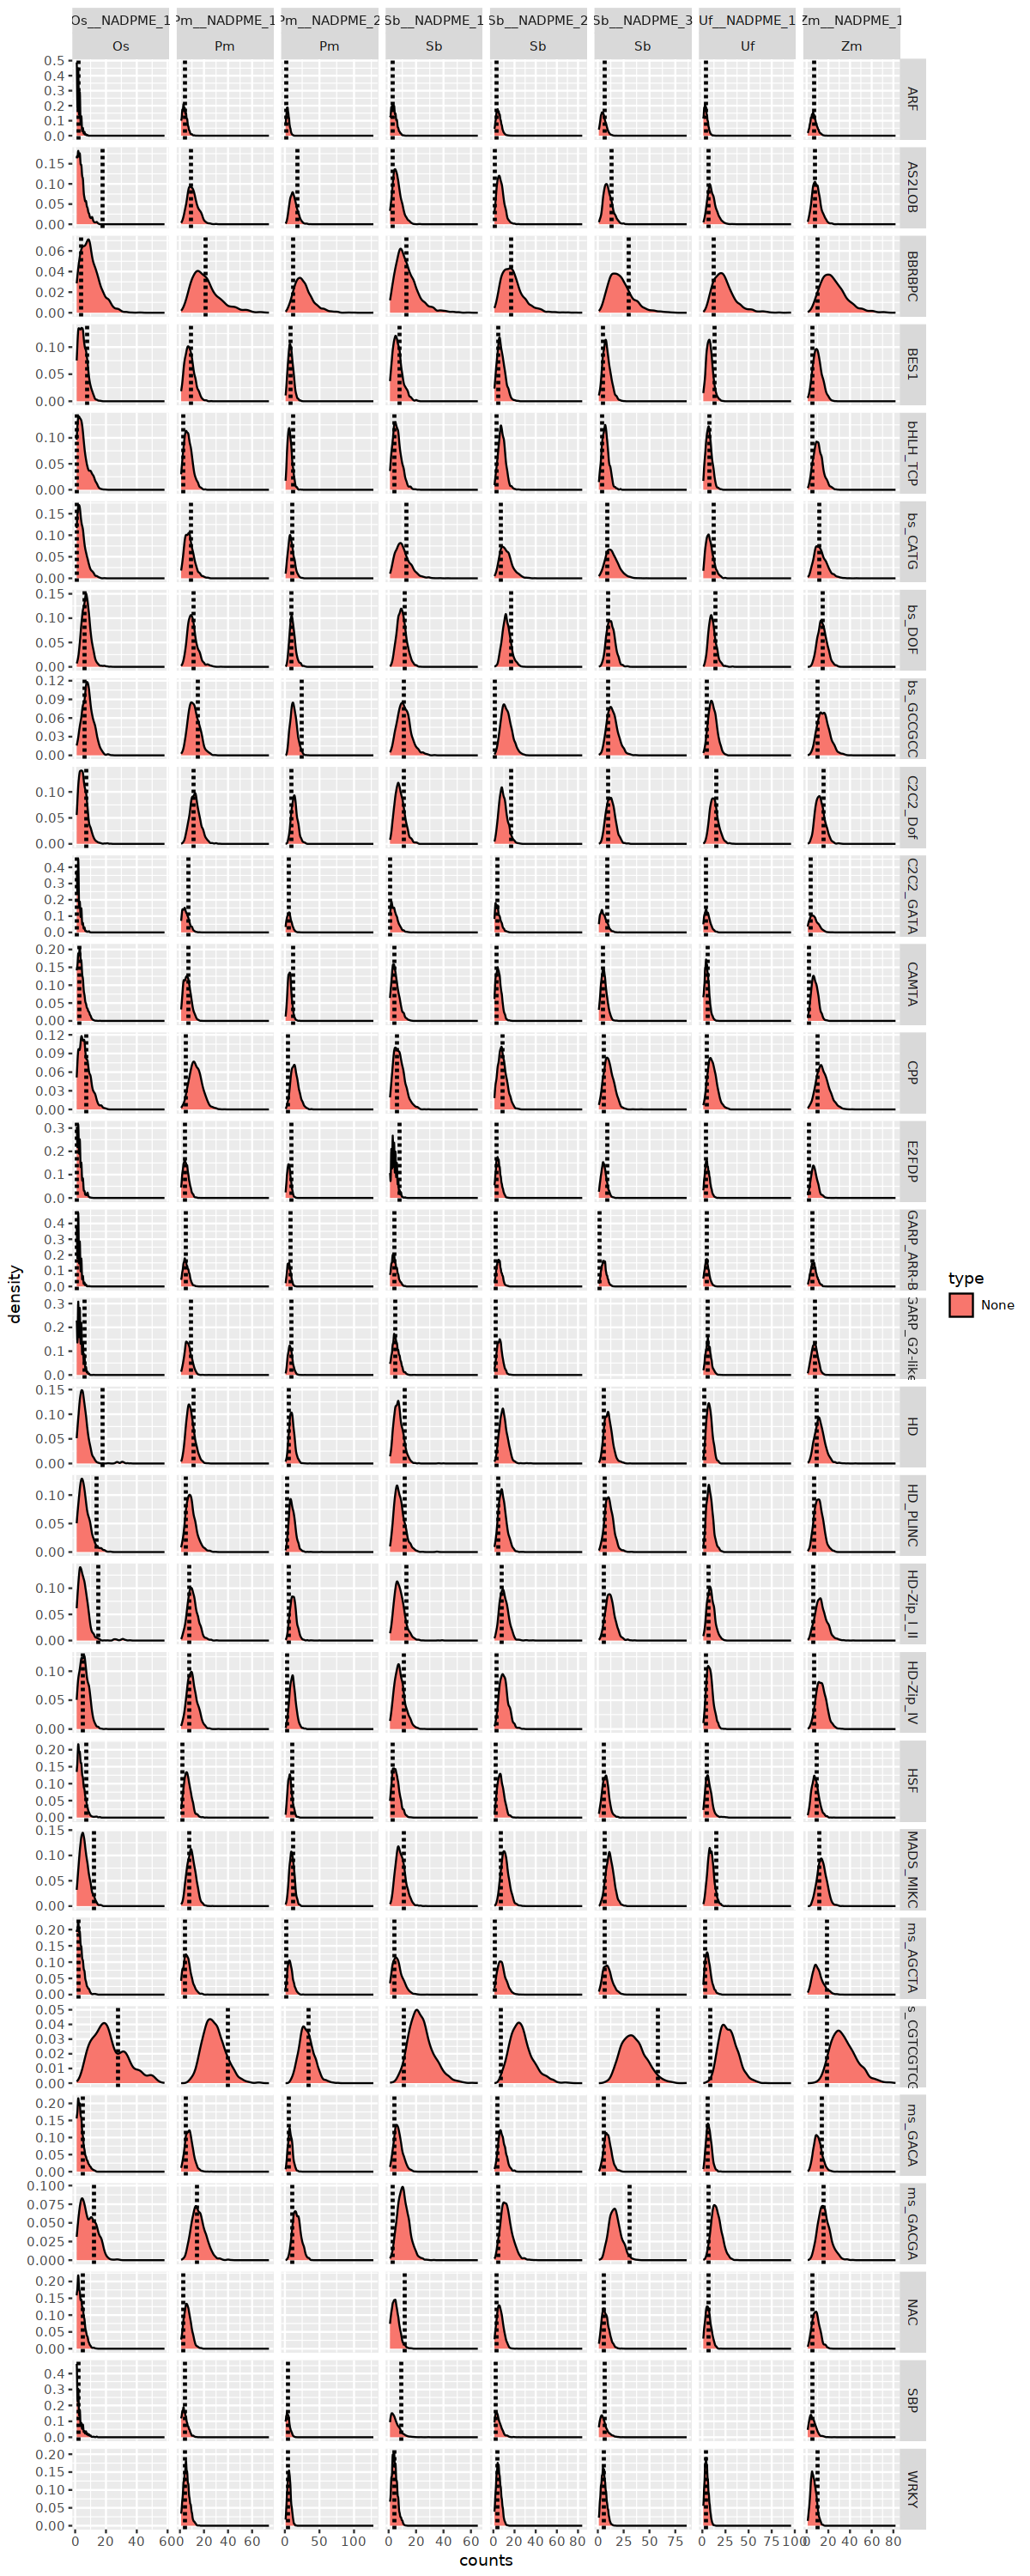

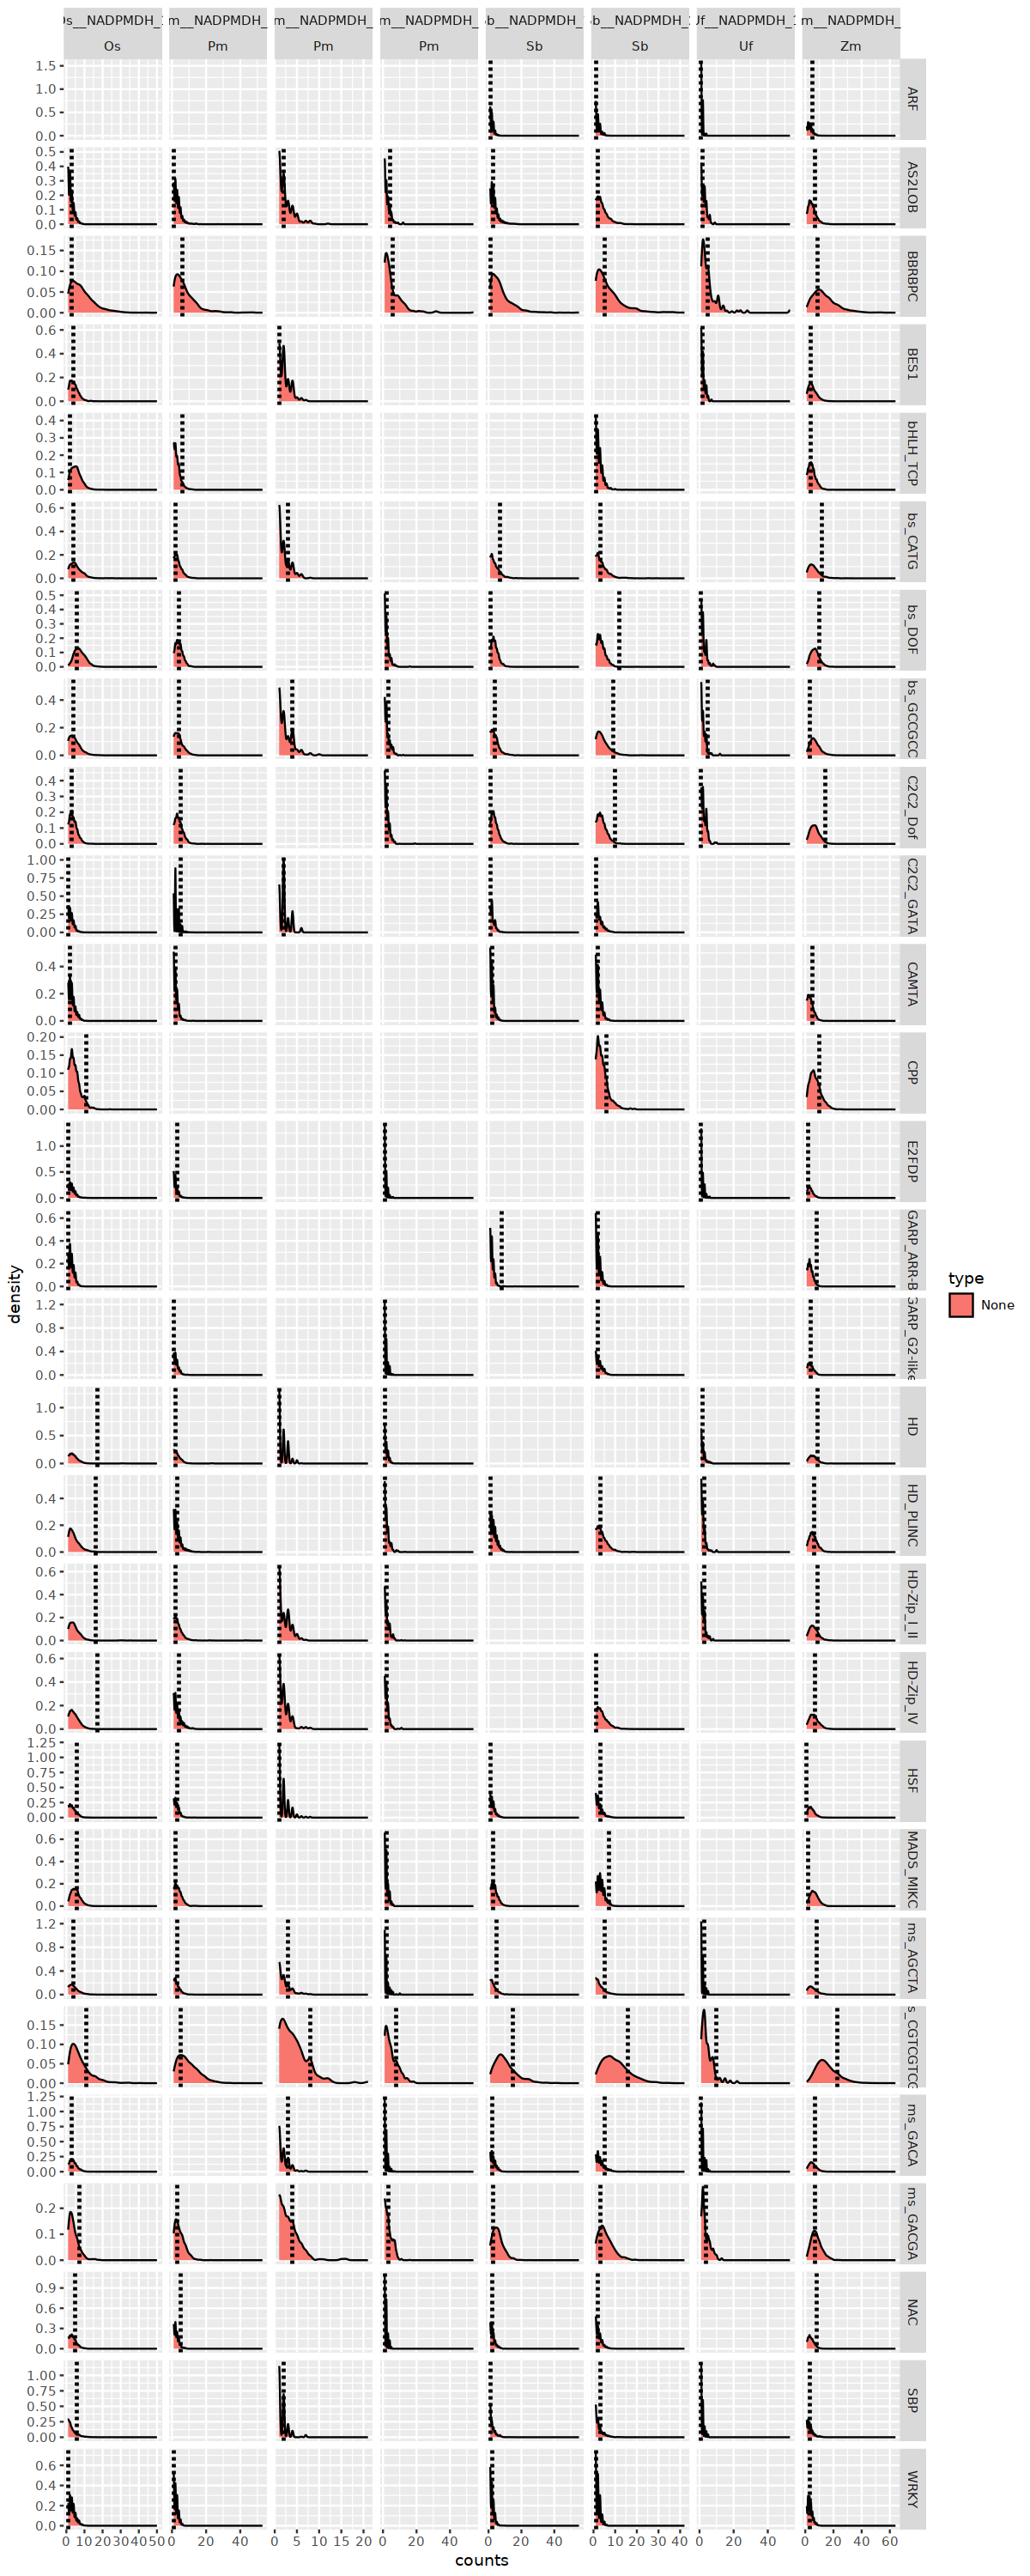

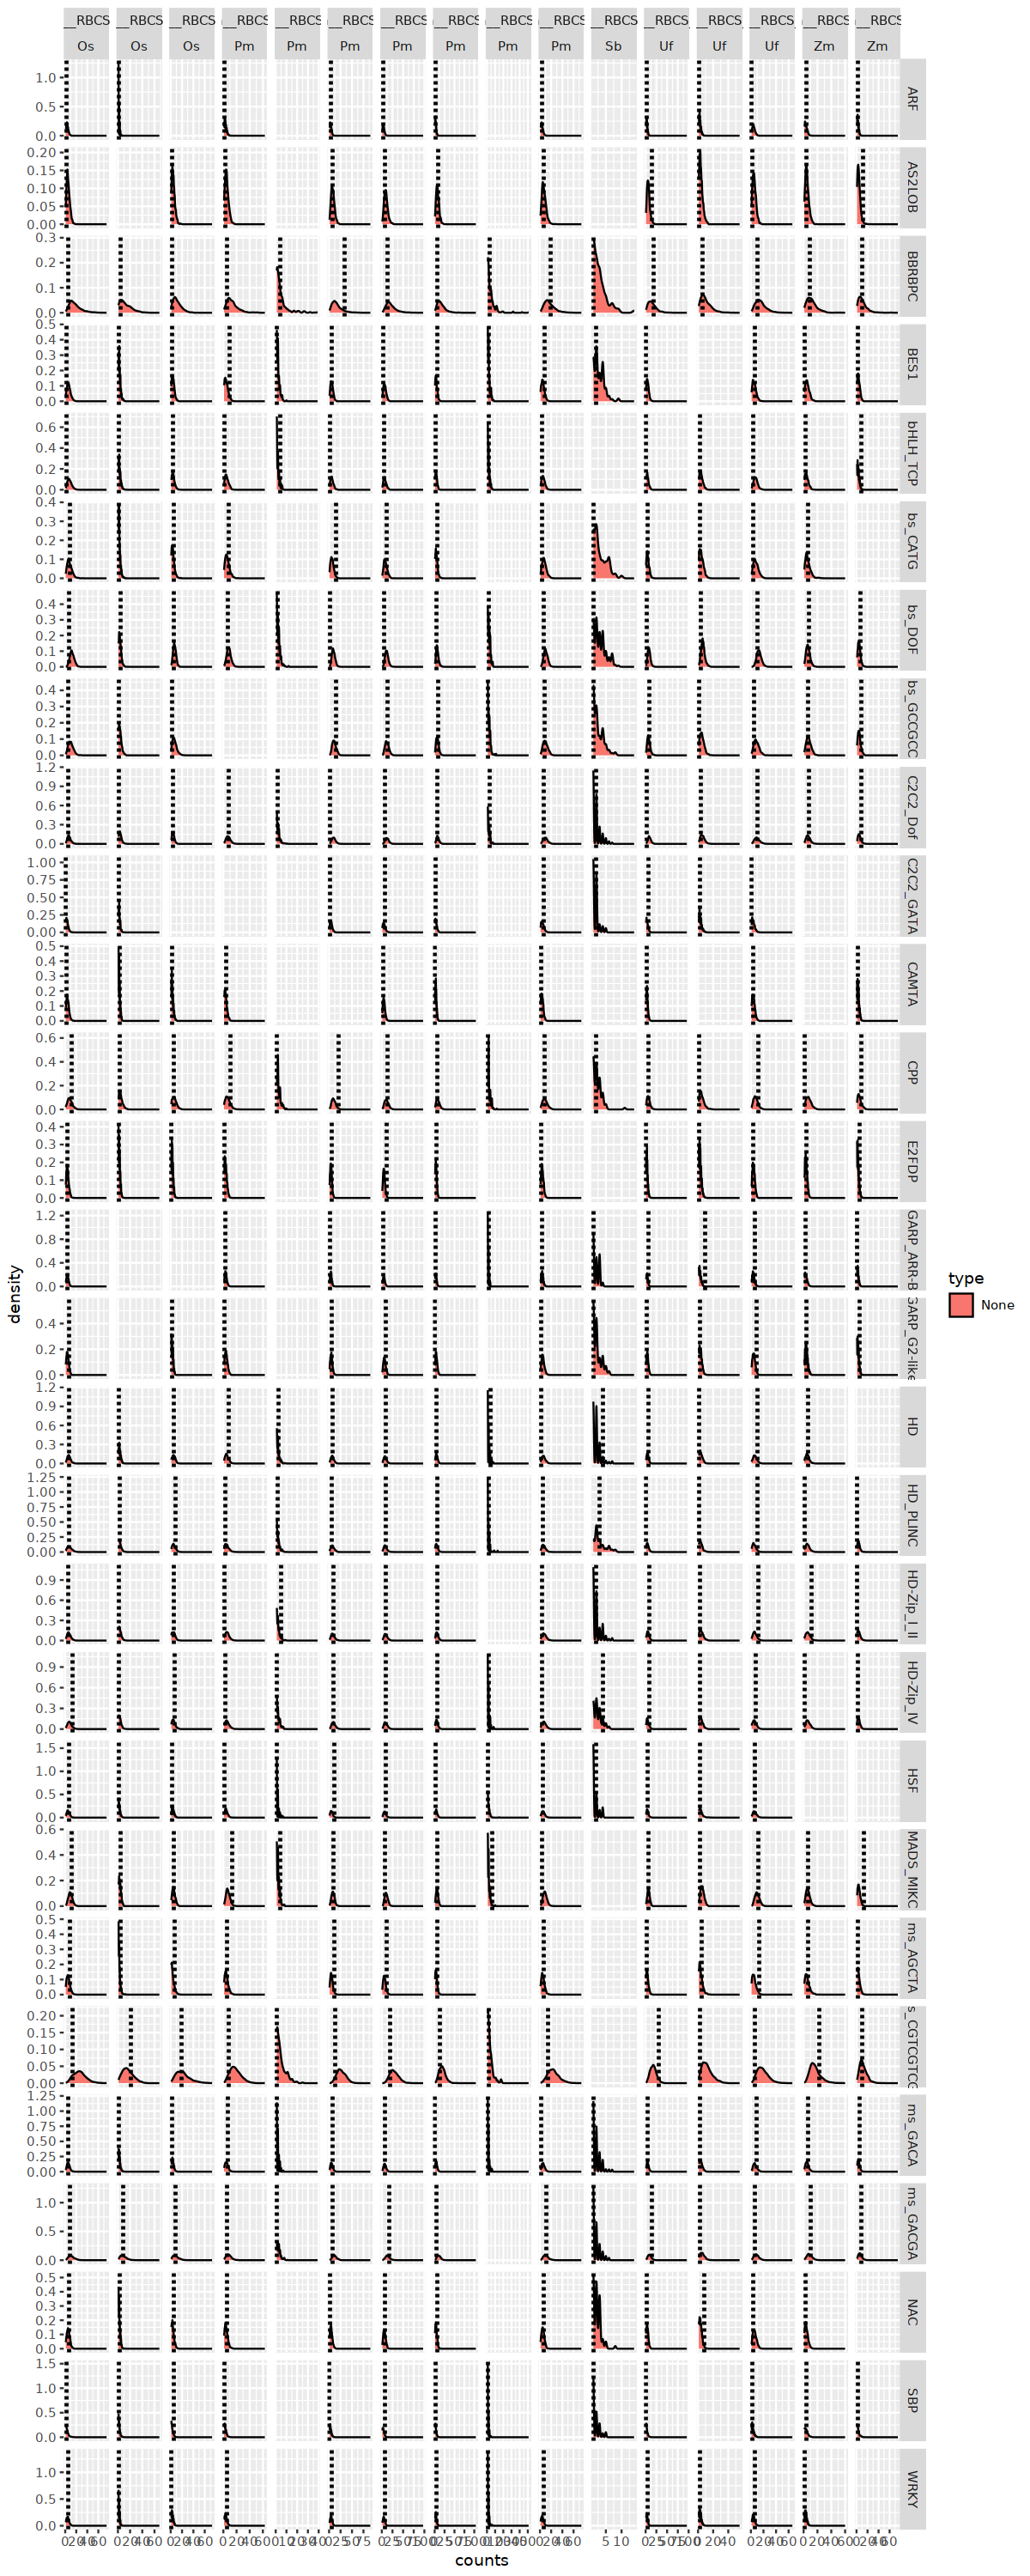

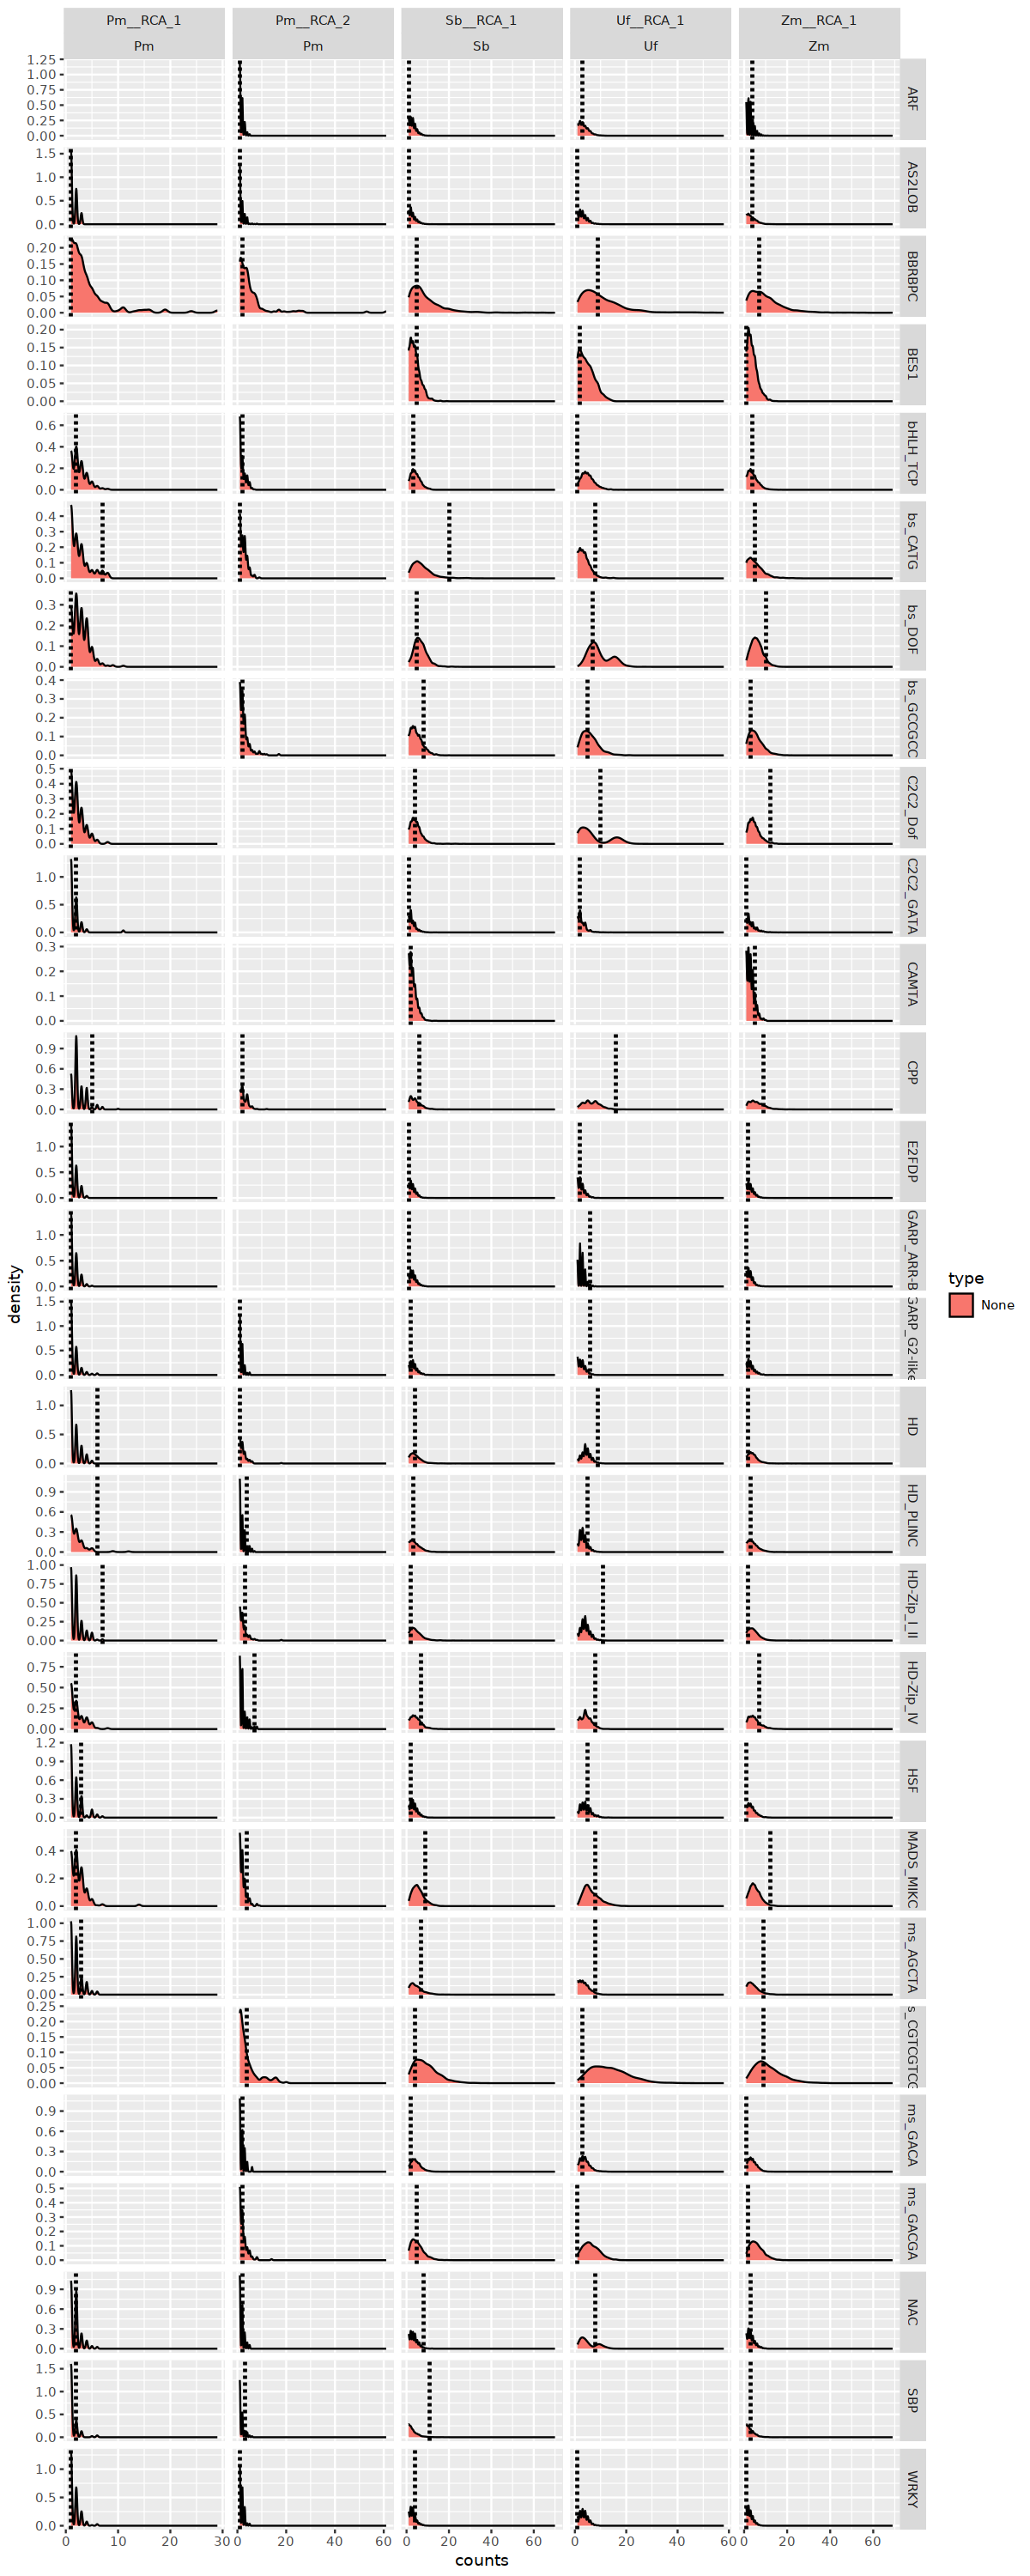

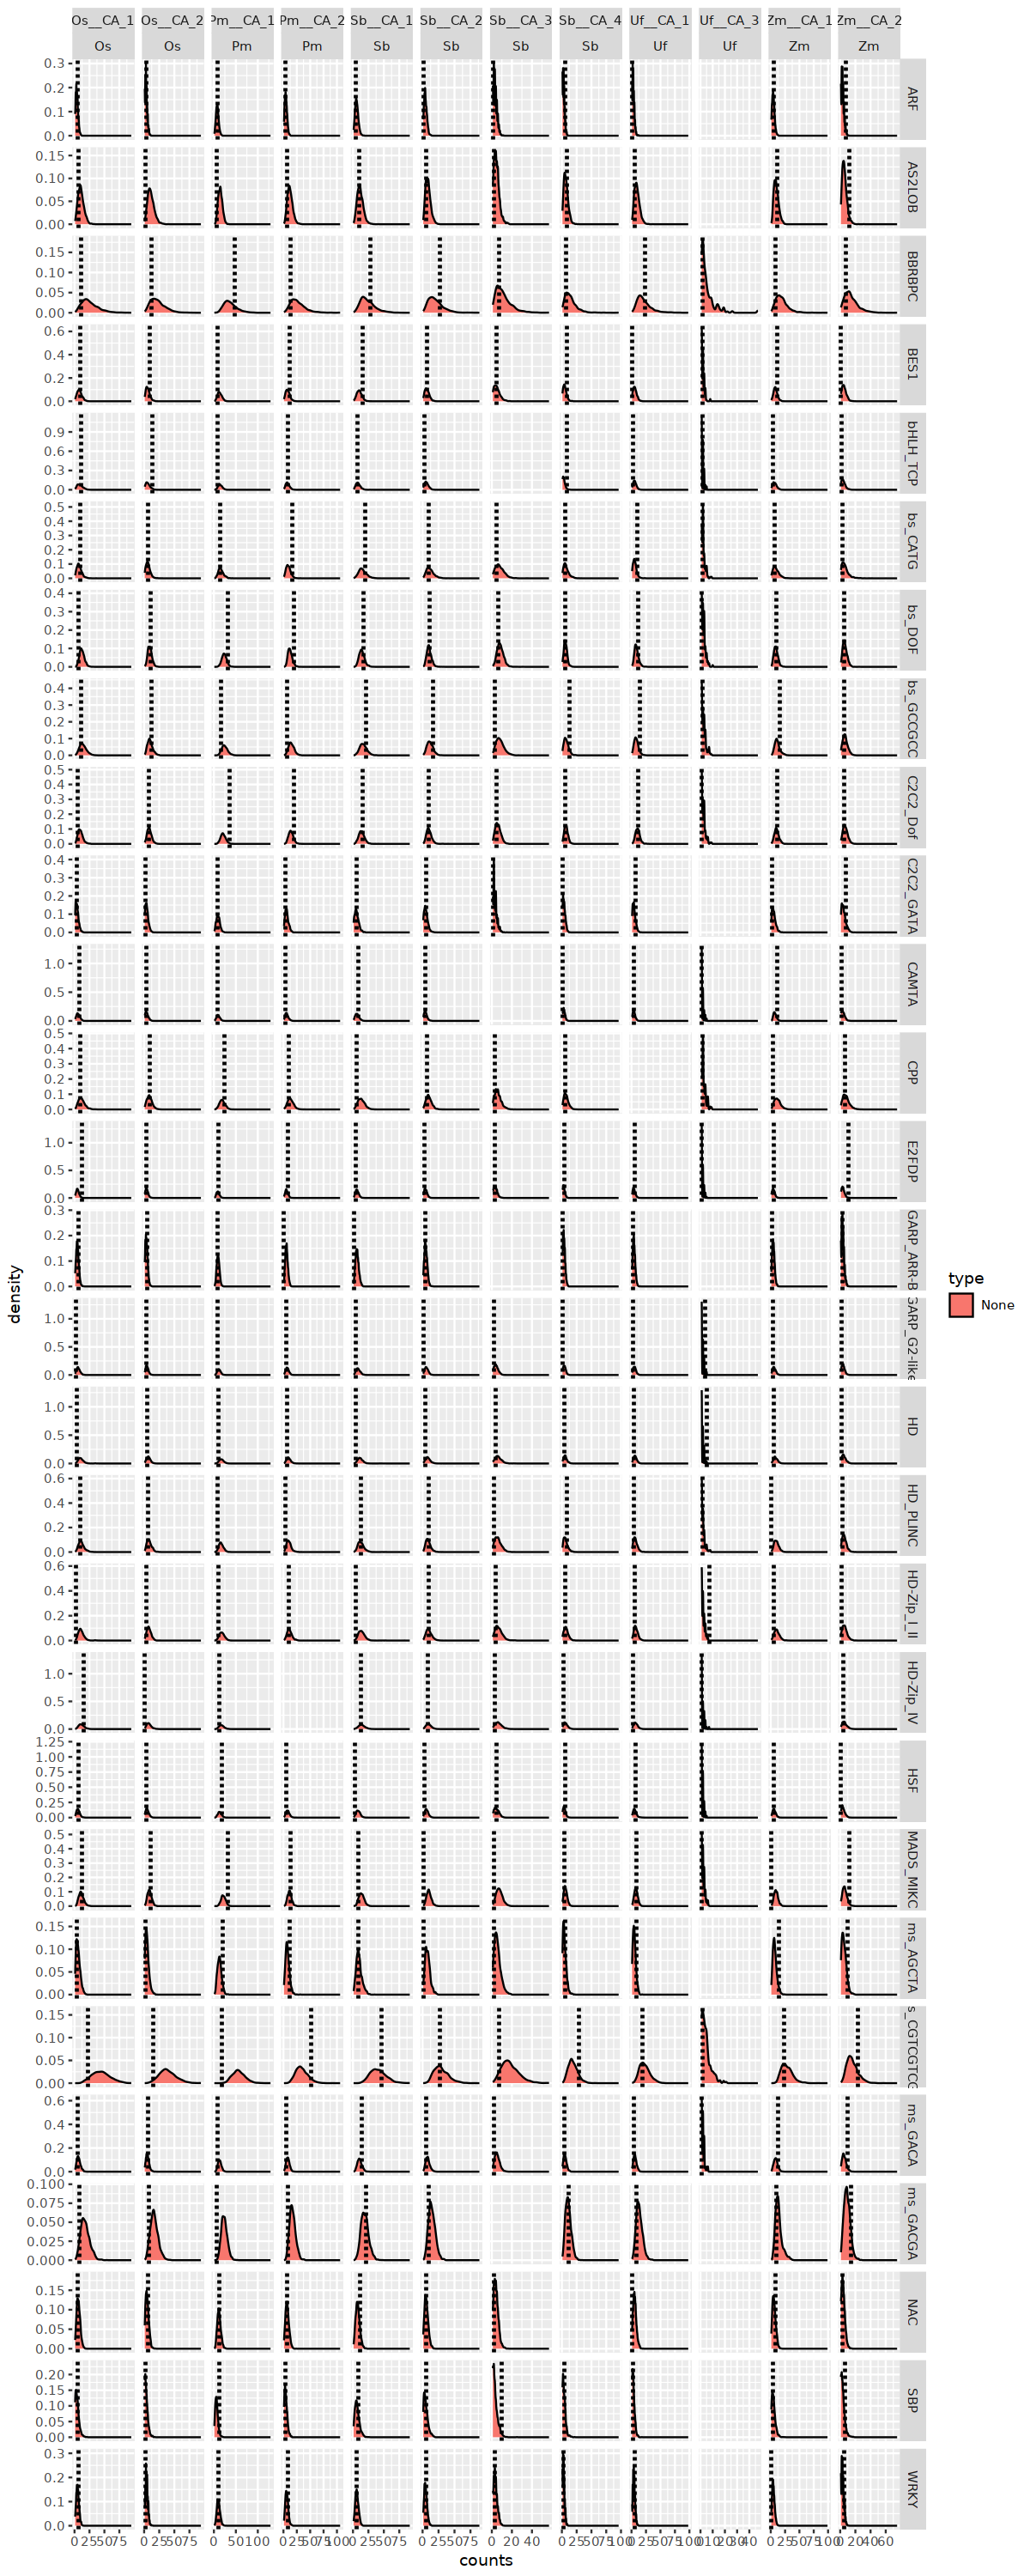

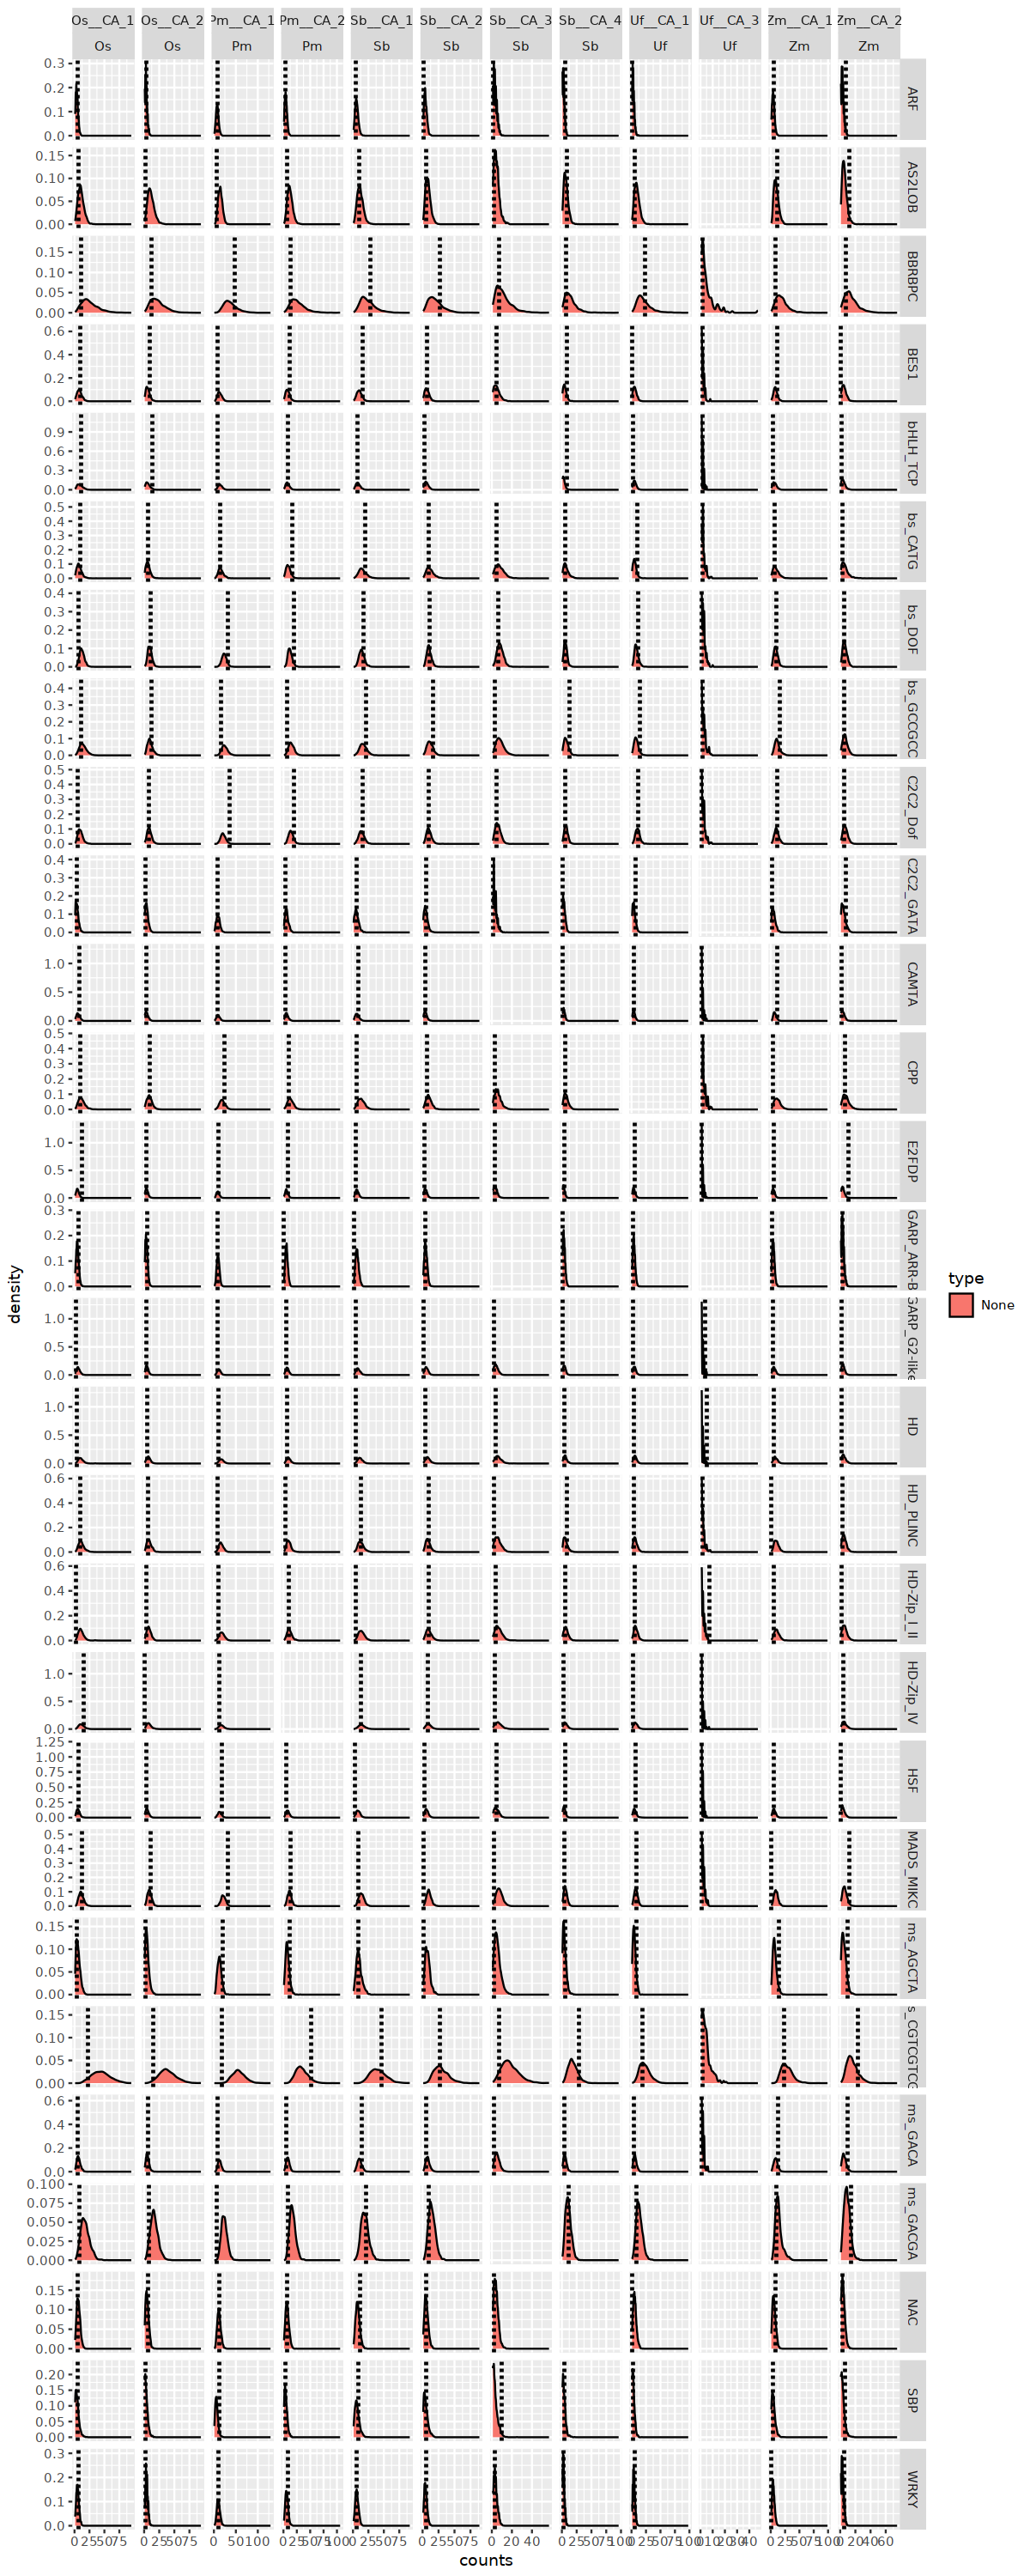

In [15]:
options(repr.plot.width=10, repr.plot.height=25)

unnested_nulls %>% 
    dplyr::filter(enzyme_class == "core") %>% 
    dplyr::filter(gene_family %in% c("PEPC")) %>% 
    ggplot(., aes(x = counts, fill = type)) + 
    geom_density() + facet_grid(TF_ID~locus + species,   
                                scales = "free") +
    geom_vline(aes(xintercept=(real_counts)),
        linetype="dashed", size=1)

unnested_nulls %>% 
    dplyr::filter(enzyme_class == "core") %>% 
    dplyr::filter(gene_family %in% c("PEPCK")) %>% 
    ggplot(., aes(x = counts, fill = type)) + 
    geom_density() + facet_grid(TF_ID~locus + species,   
                                scales = "free") +
    geom_vline(aes(xintercept=(real_counts)),
        linetype="dashed", size=1)

unnested_nulls %>% 
    dplyr::filter(enzyme_class == "core") %>% 
    dplyr::filter(gene_family %in% c("PPT")) %>% 
    ggplot(., aes(x = counts, fill = type)) + 
    geom_density() + facet_grid(TF_ID~locus + species,   
                                scales = "free") +
    geom_vline(aes(xintercept=(real_counts)),
        linetype="dashed", size=1)


unnested_nulls %>% 
    dplyr::filter(enzyme_class == "core") %>% 
    dplyr::filter(gene_family %in% c("PPDK")) %>% 
    ggplot(., aes(x = counts, fill = type)) + 
    geom_density() + facet_grid(TF_ID~locus + species,   
                                scales = "free") +
    geom_vline(aes(xintercept=(real_counts)),
        linetype="dashed", size=1)

unnested_nulls %>% 
    dplyr::filter(gene_family %in% c("NADME")) %>% 
    ggplot(., aes(x = counts, fill = type)) + 
    geom_density() + facet_grid(TF_ID~locus + species,   
                                scales = "free") +
    geom_vline(aes(xintercept=(real_counts)),
        linetype="dashed", size=1)

unnested_nulls %>% 
    dplyr::filter(gene_family %in% c("NADPME")) %>% 
    ggplot(., aes(x = counts, fill = type)) + 
    geom_density() + facet_grid(TF_ID~locus + species,   
                                scales = "free") +
    geom_vline(aes(xintercept=(real_counts)),
        linetype="dashed", size=1)

unnested_nulls %>% 
    dplyr::filter(gene_family %in% c("NADPMDH")) %>% 
    ggplot(., aes(x = counts, fill = type)) + 
    geom_density() + facet_grid(TF_ID~locus + species,   
                                scales = "free") +
    geom_vline(aes(xintercept=(real_counts)),
        linetype="dashed", size=1)

unnested_nulls %>% 
    dplyr::filter(gene_family %in% c("RBCS")) %>% 
    ggplot(., aes(x = counts, fill = type)) + 
    geom_density() + facet_grid(TF_ID~locus + species,   
                                scales = "free") +
    geom_vline(aes(xintercept=(real_counts)),
        linetype="dashed", size=1)

unnested_nulls %>% 
    dplyr::filter(gene_family %in% c("RCA")) %>% 
    ggplot(., aes(x = counts, fill = type)) + 
    geom_density() + facet_grid(TF_ID~locus + species,   
                                scales = "free") +
    geom_vline(aes(xintercept=(real_counts)),
        linetype="dashed", size=1)

unnested_nulls %>% 
    dplyr::filter(gene_family %in% c("CA")) %>% 
    ggplot(., aes(x = counts, fill = type)) + 
    geom_density() + facet_grid(TF_ID~locus + species,   
                                scales = "free") +
    geom_vline(aes(xintercept=(real_counts)),
        linetype="dashed", size=1)


unnested_nulls %>% 
    dplyr::filter(gene_family %in% c("CA")) %>% 
    ggplot(., aes(x = counts, fill = type)) + 
    geom_density() + facet_grid(TF_ID~locus + species,   
                                scales = "free") +
    geom_vline(aes(xintercept=(real_counts)),
        linetype="dashed", size=1)

In [35]:

# Function to create and save plot
create_save_plot <- function(df, gene_family) {
    
  df$species <- factor(df$species, levels = c("Zm", "Sb", "Pm", "Uf", "Os"))
  p <- ggplot(df, aes(x = counts, fill = type)) +
    geom_density() +
    facet_grid(TF_ID ~ species + locus, scales = "free") +
    geom_vline(aes(xintercept = real_counts), linetype = "dashed", size = 1) +
    ggtitle(paste("Gene Family:", gene_family)) + 
    theme_minimal()

  ggsave(paste0(file_path, "Null_permutation_graph.", gene_family, ".pdf"), plot = p, width = 15, height = 30)
}


# Group by gene family and apply the plotting function
file_path <- "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/figures/figure_6/null_permutations/" # replace with your desired file path


options(repr.plot.width=10, repr.plot.height=25)

unnested_nulls %>%
  group_by(gene_family) %>%
  group_split() %>%
  walk(~create_save_plot(.x, .x$gene_family[1]))


In [28]:
head(unnested_nulls)

TF_ID enzyme_type   locus       species_other loci    gene_family number
1 ARF   bundle_sheath Pm__AlaAT_1 Pm            AlaAT_1 AlaAT       1     
2 ARF   bundle_sheath Pm__AlaAT_1 Pm            AlaAT_1 AlaAT       1     
3 ARF   bundle_sheath Pm__AlaAT_1 Pm            AlaAT_1 AlaAT       1     
4 ARF   bundle_sheath Pm__AlaAT_1 Pm            AlaAT_1 AlaAT       1     
5 ARF   bundle_sheath Pm__AlaAT_1 Pm            AlaAT_1 AlaAT       1     
6 ARF   bundle_sheath Pm__AlaAT_1 Pm            AlaAT_1 AlaAT       1     
  real_counts sample nested_index type counts passing_val length_null pval     
1 1           real   1            None 1      828         1481        0.5590817
2 1           real   2            None 2      828         1481        0.5590817
3 1           real   3            None 2      828         1481        0.5590817
4 1           real   5            None 1      828         1481        0.5590817
5 1           real   6            None 1      828         1481        0.5590817
6 1           real   8            None 2      828         1481        0.5590817
  species enzyme_class number_acrs avg_motif_per_acr_null
1 Pm      variable     2           0.5                   
2 Pm      variable     2           1.0                   
3 Pm      variable     2           1.0                   
4 Pm      variable     2           0.5                   
5 Pm      variable     2           0.5                   
6 Pm      variable     2           1.0                   
  avg_motif_per_acr_real
1 0.5                   
2 0.5                   
3 0.5                   
4 0.5                   
5 0.5                   
6 0.5